### part4 - clustering - K-Means

- 학습 날짜 : 2019 - 04 - 01 ~ 07
- There are some problem in my studying....에휴...

### K-Means intuition

- centroid : 도형의 중심

![alt text](k_means_2.png)
![alt text](k_means_3.png)
![alt text](k_means_4.png)
![alt text](k_means_5.png)

![alt text](k_means_6.png)
![alt text](k_means_7.png)
![alt text](k_means_8.png)
![alt text](k_means_9.png)
![alt text](k_means_10.png)
![alt text](k_means_11.png)

![alt text](k_means_12.png)
![alt text](k_means_13.png)

### Random initialization trap

- bad initialization?

![alt text](k_means_14.png)
![alt text](k_means_15.png)
![alt text](k_means_16.png)
![alt text](k_means_17.png)

### solution : K-Means ++
![alt text](k_means_18.png)

### choosing the right number of clusters

![alt text](k_means_19.png)
![alt text](k_means_20.png)
![alt text](k_means_21.png)
![alt text](k_means_22.png)
![alt text](k_means_23.png)
![alt text](k_means_24.png)

### code!!!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# importing the mall dataset with pandas
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
X = dataset.iloc[:, [3,4]].values

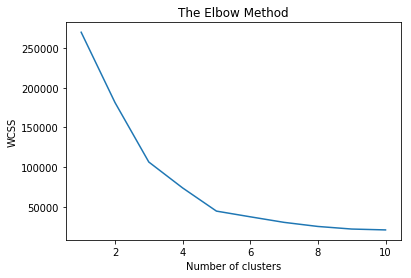

In [9]:
# using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters = i, 
        init = 'k-means++', 
        max_iter = 300, 
        n_init = 10, 
        random_state = 0
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
# Applying K-means to the mall dataset
kmeans = KMeans(
    n_clusters = 5, 
    init = 'k-means++', 
    max_iter = 300, 
    n_init = 10, 
    random_state = 0
)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

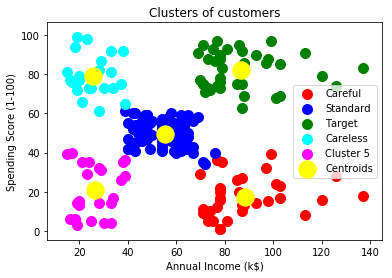

In [12]:
# visualising the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()